# Book Comparison
## Can we find similarities between books using NLP techniques

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
import codecs
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import softcossim
import gensim.downloader as api
from gensim import corpora
import re
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cwoodall6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cwoodall6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/cwoodall6/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [5]:
def get_text(name):
    text = u""
    path = './final_project_data/' + name
    with codecs.open(path, "r", "utf-8") as book_file:
      text += book_file.read()
    return text 

In [6]:
def sentence_to_wordlist(raw):
    '''Remove all characters except letters'''
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [7]:
def remove_stops(text):
    enlgish_stops = set(stopwords.words('english'))
    no_stops = []
    for sentence in text:
        raw_nostop_sentence = []
        for word in sentence:
            if word.lower() not in enlgish_stops:
                raw_nostop_sentence.append(word.lower())
        no_stops.append(raw_nostop_sentence)
    return no_stops

In [8]:
def lemmatize(text):
    wordnet_lemmatizer = WordNetLemmatizer()

    lemmatized = []
    for sentence in text:
        for word in sentence:
            lemmatized.append(wordnet_lemmatizer.lemmatize(word))
    return lemmatized

In [9]:
def process_text(text):
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(sentence_to_wordlist(raw_sentence))
    sentences = remove_stops(sentences)
    sentences = lemmatize(sentences)
    return sentences

In [10]:
book_list = ['A_Dolls_House_by_Henrik_Ibsen.rtf',
            'A_Tale_of_Two_Cities_by_Charles_Dickens.rtf',
            'Adventures_of_Huckleberry_Finn_by_Mark_Twain.rtf',
            'Alices_Adventures_in_Wonderland_by_Lewis_Carroll.rtf',
            'Dracula_by_Bram_Stoker.rtf',
            'Emma_by_Jane_Austen.rtf',
            'Frankenstein_by_Mary_Shelley.rtf',
            'Great_Expectations_by_Charles_Dickens.rtf',
            'Grimms_Fairy_Tales_by_The_Brothers_Grimm.rtf',
            'Metamorphosis_by_Franz_Kafka.rtf',
            'Pride_and_Prejudice_by_Jane_Austen.rtf',
            'The_Adventures_of_Sherlock_Holmes_by_Arthur_Conan_Doyle.rtf',
            'The_Adventures_of_Tom_Sawyer_by_Mark_Twain.rtf',
            'The_Count_of_Monte_Cristo_by_Alexandre_Dumas.rtf',
            'The_Importance_of_Being_Earnest_by_Oscar_Wilde.rtf',
            'The_Picture_of_Dorian_Gray_by_Oscar_Wilde.rtf',
            'The_Prince_by_Nicolo_Machiavelli.rtf',
            'The_Romance_of_Lust_by_Anonymous.rtf',
            'The_Yellow_Wallpaper_by_Charlotte_Perkins_Gilman.rtf',
            'Ulysses_by_James_Joyce.rtf']

In [51]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

dataframes = []
documents = []
for book in book_list:
    print('Adding: ' + book)
    raw_sentences = tokenizer.tokenize(get_text(book))
    corpus = process_text(raw_sentences)
    bow = Counter(corpus)
    documents.append(bow)
    df = pd.DataFrame.from_dict(bow, orient='index').reset_index()
    df = df.rename(columns={'index':'word', 0:'count'})
    df = df.sort_values(by=['count'], ascending=False)
    dataframes.append(df)

Adding: A_Dolls_House_by_Henrik_Ibsen.rtf
Adding: A_Tale_of_Two_Cities_by_Charles_Dickens.rtf
Adding: Adventures_of_Huckleberry_Finn_by_Mark_Twain.rtf
Adding: Alices_Adventures_in_Wonderland_by_Lewis_Carroll.rtf
Adding: Dracula_by_Bram_Stoker.rtf
Adding: Emma_by_Jane_Austen.rtf
Adding: Frankenstein_by_Mary_Shelley.rtf
Adding: Great_Expectations_by_Charles_Dickens.rtf
Adding: Grimms_Fairy_Tales_by_The_Brothers_Grimm.rtf
Adding: Metamorphosis_by_Franz_Kafka.rtf
Adding: Pride_and_Prejudice_by_Jane_Austen.rtf
Adding: The_Adventures_of_Sherlock_Holmes_by_Arthur_Conan_Doyle.rtf
Adding: The_Adventures_of_Tom_Sawyer_by_Mark_Twain.rtf
Adding: The_Count_of_Monte_Cristo_by_Alexandre_Dumas.rtf
Adding: The_Importance_of_Being_Earnest_by_Oscar_Wilde.rtf
Adding: The_Picture_of_Dorian_Gray_by_Oscar_Wilde.rtf
Adding: The_Prince_by_Nicolo_Machiavelli.rtf
Adding: The_Romance_of_Lust_by_Anonymous.rtf
Adding: The_Yellow_Wallpaper_by_Charlotte_Perkins_Gilman.rtf
Adding: Ulysses_by_James_Joyce.rtf
Adding: de

In [13]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator
    
# code snippet from https://stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings

## Let's Compare
First let's see the similarity between 2 random books then look at there dataframes.

In [36]:
random1 = np.random.randint(len(book_list))
random2 = np.random.randint(len(book_list))
 
cosine = get_cosine(documents[random1], documents[random2])
print('Percent Similarty between {} and {}: {}'.format(book_list[random1], book_list[random2], cosine*100))
display_side_by_side(dataframes[random1].head(25), dataframes[random2].head(25))

Percent Similarty between A_Tale_of_Two_Cities_by_Charles_Dickens.rtf and The_Prince_by_Nicolo_Machiavelli.rtf: 52.074805268909685


,word,count
652,said,661
239,mr,640
135,one,444
822,lorry,369
166,hand,364
740,would,343
178,time,318
2341,defarge,302
815,man,300
514,upon,291


## Visualize

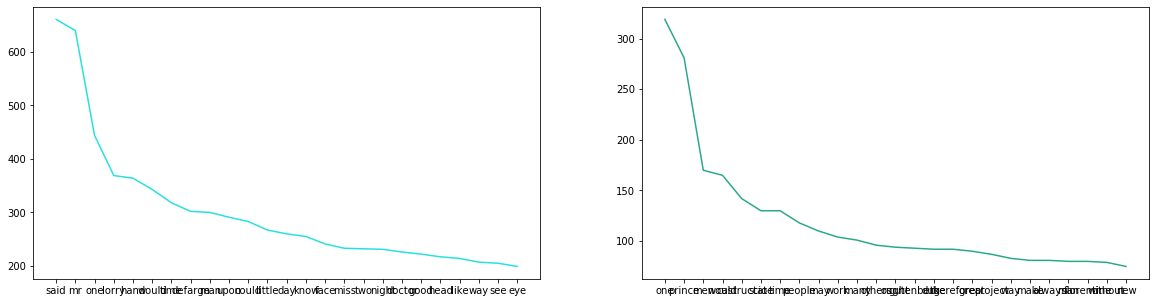

In [43]:
figure = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(dataframes[random1]['word'][:25], dataframes[random1]['count'][:25], color=np.random.rand(3))
plt.subplot(1, 2, 2)
plt.plot(dataframes[random2]['word'][:25], dataframes[random2]['count'][:25], color=np.random.rand(3))
plt.show()